# Project Name: Regression-Based Approach for Accurate House Price Forecasting

### Group No: 15

### Group Members: Md Fahimul Kabir Chowdhury, Jayed Mohammad Barek

## 1. Imports and Data Loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target, name='MedHouseVal')


## 2. Data Exploration

In [ ]:
df = X.copy()
df['MedHouseVal'] = y

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
print(df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

## 3. Data Preprocessing

In [ ]:
# Null check
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


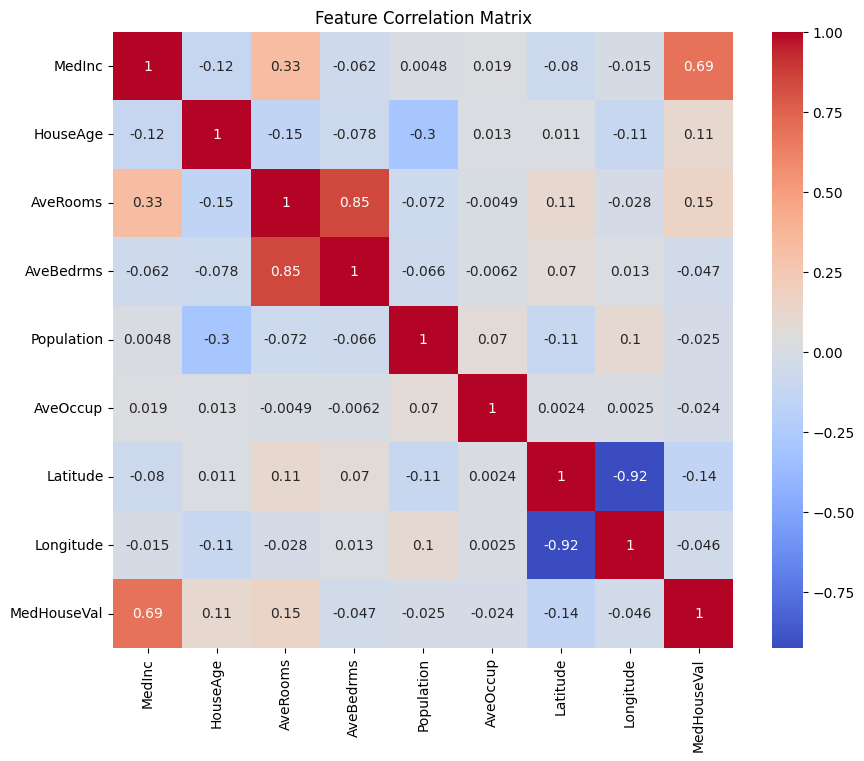

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

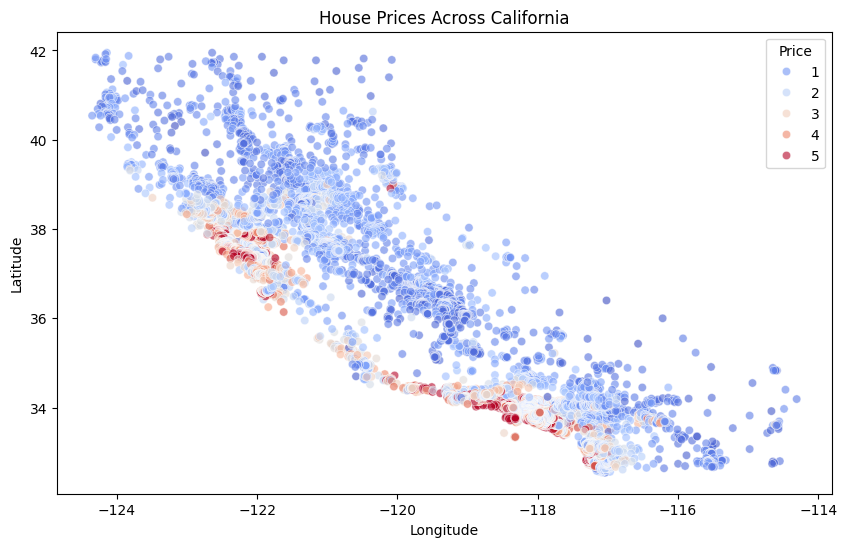

In [ ]:
# Color-coded scatterplot showing geographic pattern
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='MedHouseVal', palette='coolwarm', alpha=0.6)
plt.title('House Prices Across California')
plt.legend(title='Price')
plt.show()

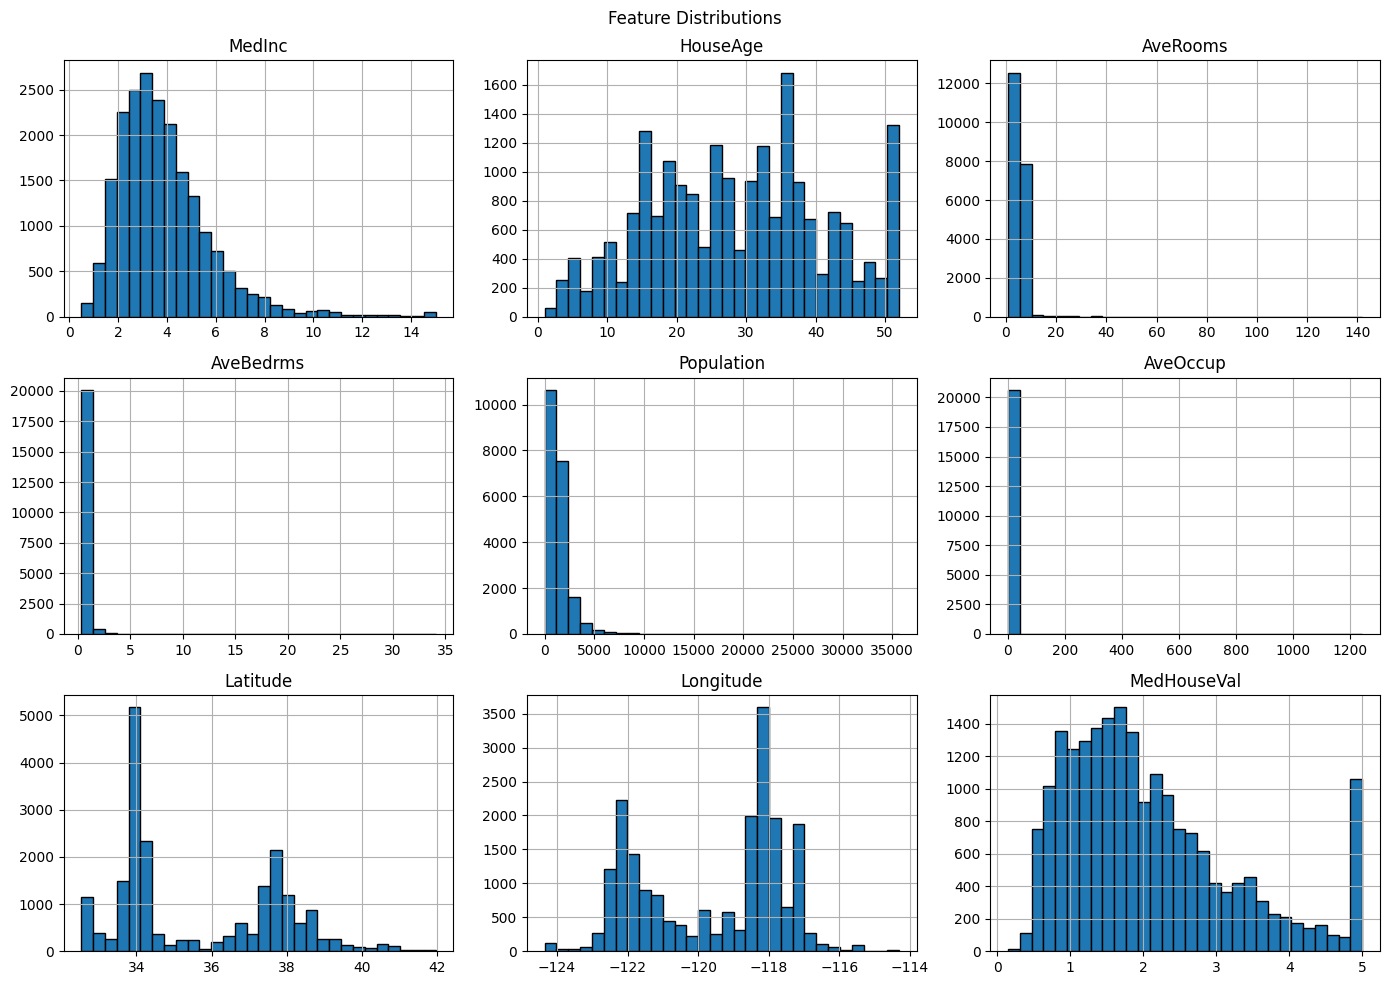

In [ ]:
# Histograms
df.hist(bins=30, figsize=(14, 10), edgecolor='black')
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()


## 4. Feature Engineering

In [ ]:
# Add Engineered Features
X["RoomsPerHousehold"] = X["AveRooms"] / X["AveOccup"]
X["BedroomsPerRoom"] = X["AveBedrms"] / X["AveRooms"]
X["PopulationPerHousehold"] = X["Population"] / X["AveOccup"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5. Model Training

In [ ]:
# Train Models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)

lr.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)

# Predictions
lr_preds = lr.predict(X_test_scaled)
rf_preds = rf.predict(X_test_scaled)


In [ ]:
# Evaluation Function
def evaluate_model(y_true, y_pred, name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f" {name}")
    print(f"  MSE: {mse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R²:  {r2:.4f}\n")

# Evaluate
evaluate_model(y_test, lr_preds, "Linear Regression")
evaluate_model(y_test, rf_preds, "Random Forest Regressor")

 Linear Regression
  MSE: 0.4540
  MAE: 0.4874
  R²:  0.6535

 Random Forest Regressor
  MSE: 0.2561
  MAE: 0.3299
  R²:  0.8046



## 6. Model Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    verbose=1,
    n_jobs=-1
)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Best model
best_rf = grid_search.best_estimator_
print("Best Parameters Found:\n", grid_search.best_params_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters Found:
 {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# Use the best estimator found by GridSearchCV
best_rf = grid_search.best_estimator_

# Predict on the test set
best_rf_preds = best_rf.predict(X_test_scaled)

## 7. Final Prediction & Interpretation


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluation Function
def evaluate_model(y_true, y_pred, name="Model"):
    print(f"\n🔍 {name} Evaluation:")
    print(f"  ➤ Mean Squared Error (MSE):      {mean_squared_error(y_true, y_pred):.4f}")
    print(f"  ➤ Mean Absolute Error (MAE):     {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"  ➤ R-squared (R² Score):          {r2_score(y_true, y_pred):.4f}")

# Evaluate
evaluate_model(y_test, best_rf_preds, "Tuned Random Forest")



🔍 Tuned Random Forest Evaluation:
  ➤ Mean Squared Error (MSE):      0.2549
  ➤ Mean Absolute Error (MAE):     0.3284
  ➤ R-squared (R² Score):          0.8054


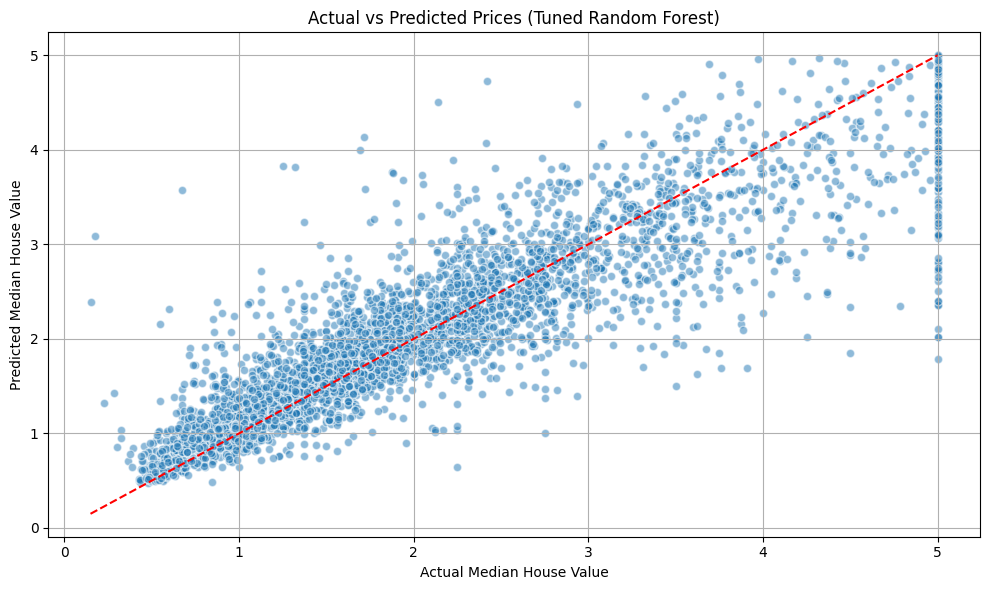

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_rf_preds, alpha=0.5, edgecolors='w')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted Prices (Tuned Random Forest)")
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-35-95bf0b323307>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")


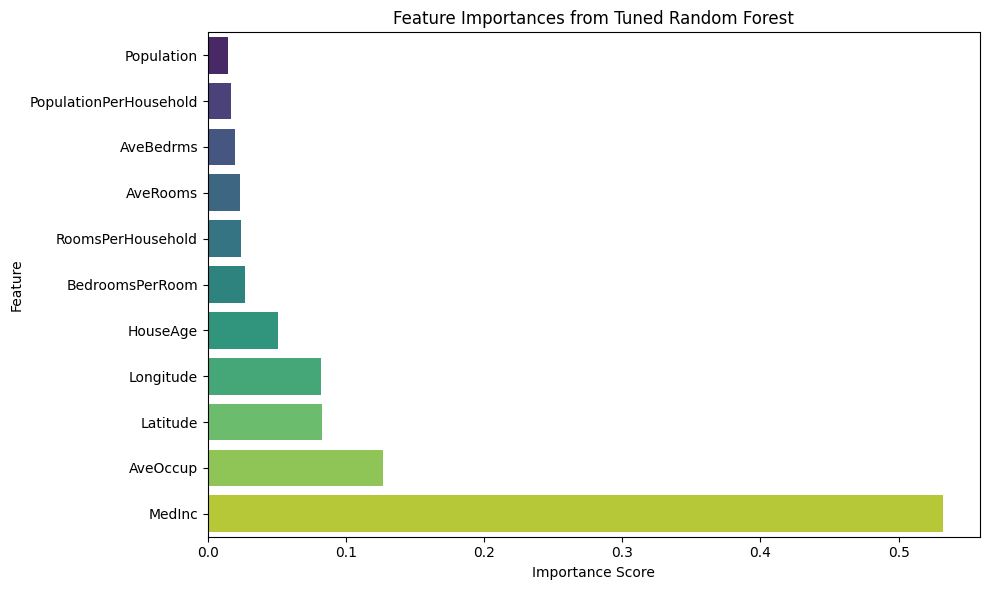

In [ ]:
import seaborn as sns
import pandas as pd

# Get feature importances
feature_importance = pd.Series(best_rf.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")
plt.title("Feature Importances from Tuned Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
